## Рабочая тетрадь №8

Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта, а затем применим алгоритм k-средних, чтобы увидеть результат.

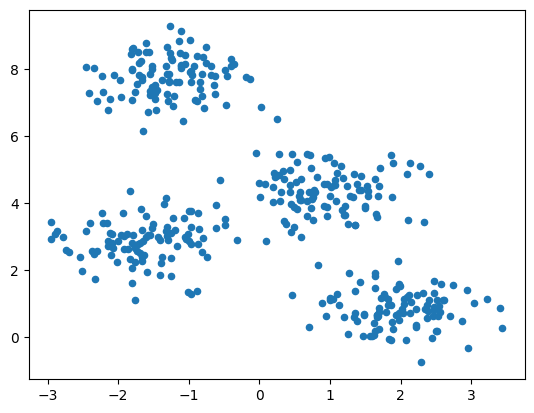

None


In [1]:
# Начнём с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Сгенерируем данные
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 20)
print(plt.show())

In [2]:
# затем создадим объект KMeans вместе с указанием количества кластеров
# и обучим модель, сделаем прогноз следующим образом:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

d:\Codes\Python\Data\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Codes\Python\Data\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


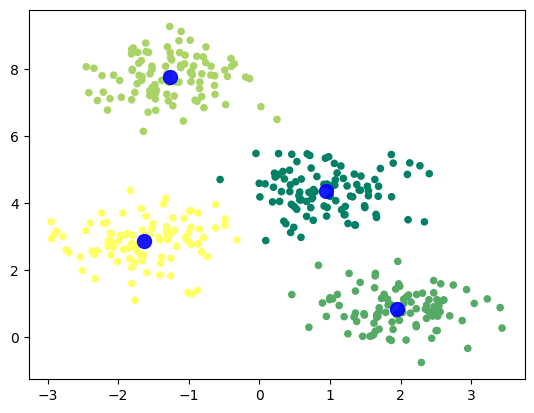

In [3]:
# построим и визуализируем центры кластера, выбранные с помощью k-средних оценки Python
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha=0.9)
plt.show()

### 1.1.1 Пример
Проведем кластеризацию K-средних к набору простых цифр. K-means попытается идентифицировать похожие цифры

In [4]:
# Начнём с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
# выполним кластеризацию
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

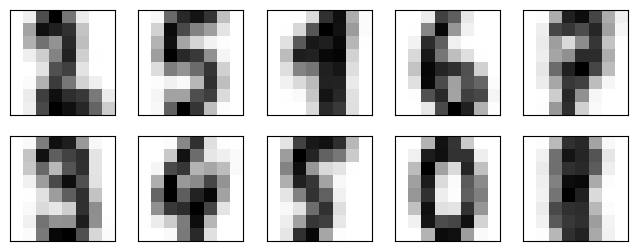

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Задание 
Дан массив данных

X = np. array([[5,3],
                [10,15],
                [15,12],
                [24,10],
                [30,45],
                [85,70],
                [71,80],
                [60,78],
                [55,52],
                [80,91],])

Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

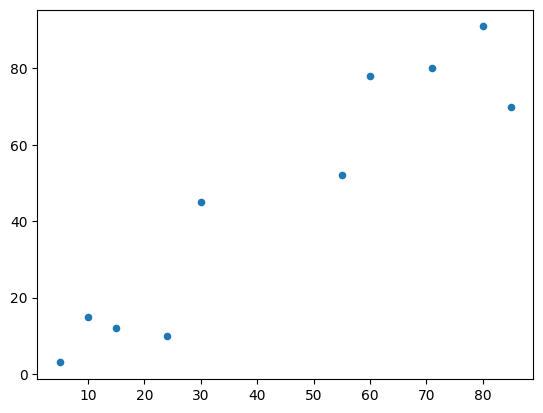

None


In [7]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])
plt.scatter(X[:, 0], X[:, 1], s = 20)
print(plt.show())

In [8]:
# выполним кластеризацию
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

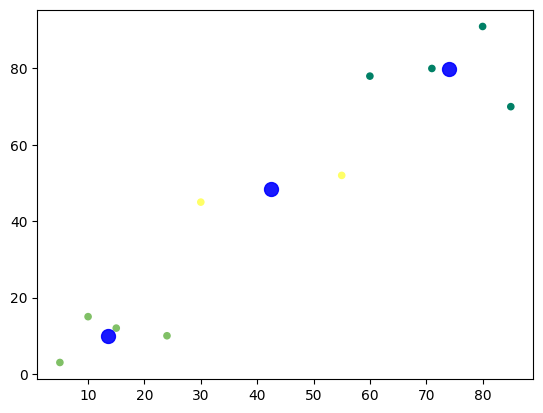

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha=0.9)
plt.show()

Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [10]:
from sklearn.datasets import load_iris
dataframe = load_iris()

X = dataframe.data

kmeans = KMeans(n_clusters = 3)
kmeans.fit(dataframe.data)
y_kmeans = kmeans.predict(dataframe.data)

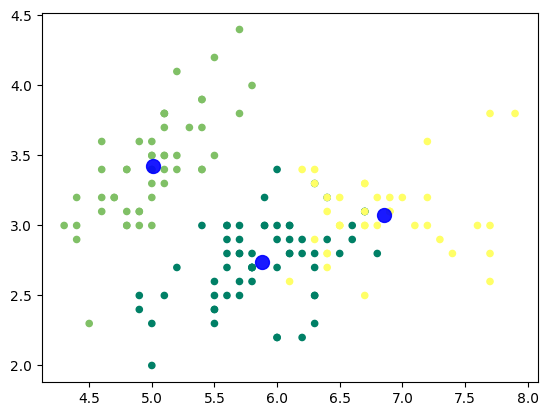

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha=0.9)
plt.show()

### 1.1.2 Пример
Построить дендрограмму для заданного массива данных.

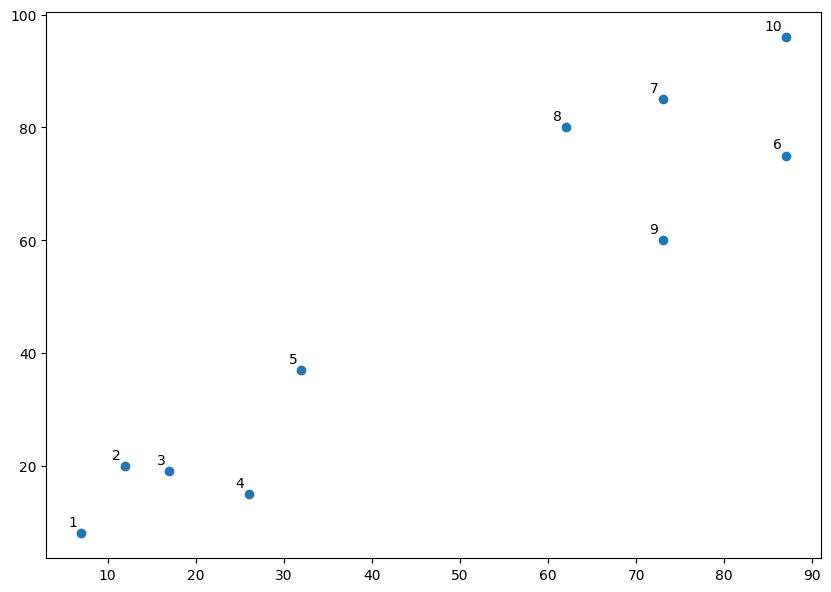

In [12]:
X = np.array(
    [[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85],[62,80],[73,60],[87,96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

Далее построим дендрограмму для точек данных с помощью библиотеки Scipy

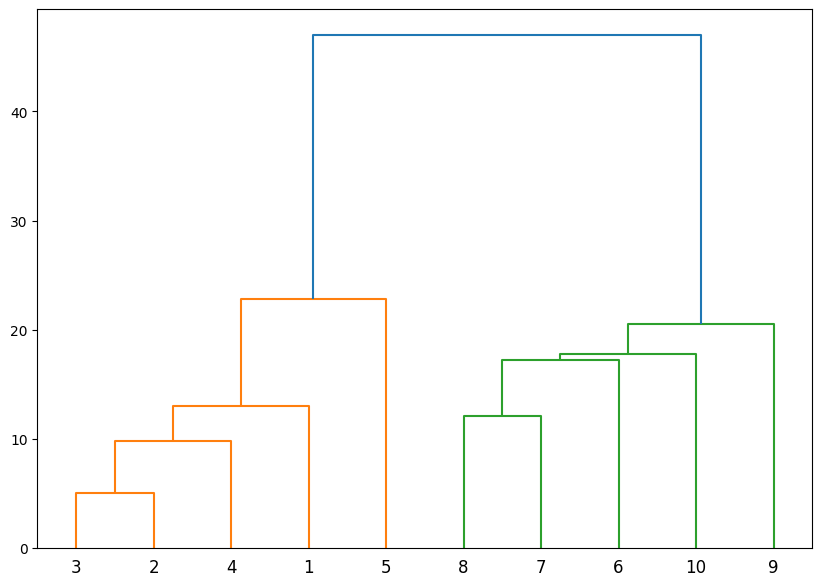

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10,7))
dendrogram(linked, orientation = 'top', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)
plt.show()

Далее нам нужно импортировать класс для кластеризации и вызвать его метод fit_predict для прогнозирования кластера.

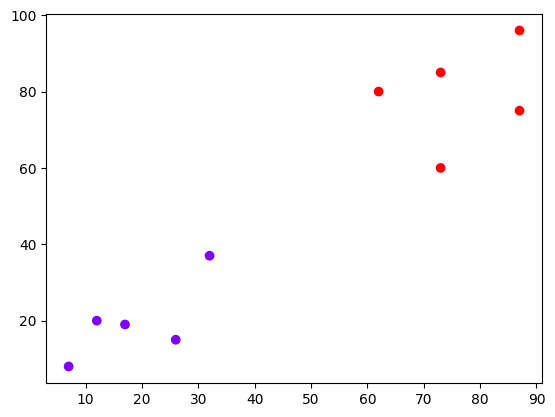

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = cluster.labels_, cmap='rainbow')

### Пример
В этом примере мы выполним иерархическую кластеризацию реальных данных и посмотрим, как ее можно использовать для решения реальной проблемы. Выполним кластеризацию данных по набору

https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv

Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы разделить клиентов на разные группы в зависимости от их покупательских тенденций.

In [15]:
# импортируем библиотеки
import pandas as pd
url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
customer_data.shape

(200, 5)

Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

In [ ]:
data = customer_data.iloc[:, 3:5].values

Далее нам нужно знать кластеры, на которые мы хотим разделить наши данные. Мы снова будем использовать библиотеку scipy для создания дендрограммы:

<Figure size 5040x2160 with 0 Axes>

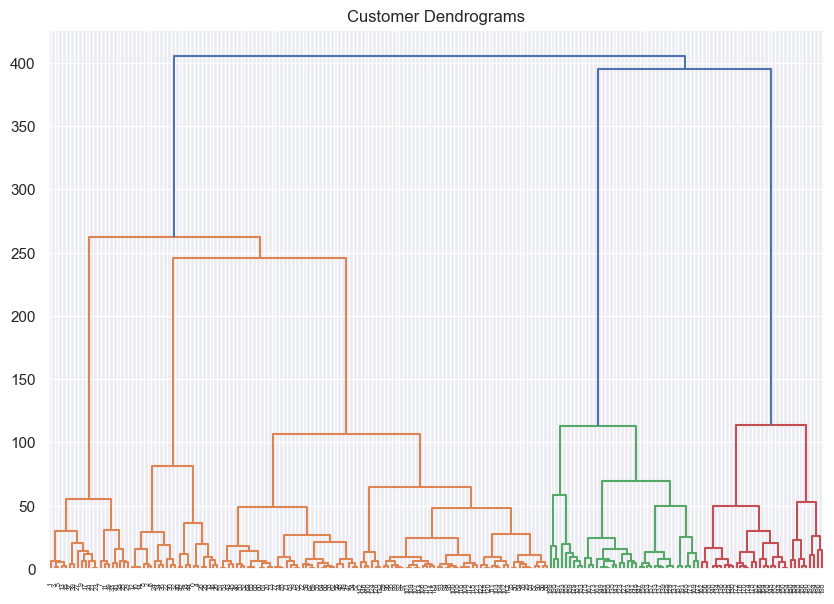

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

Если мы нарисуем горизонтальную линию, которая проходит через самое длинное расстояние без горизонтальной линии, мы получим 5 кластеров. Теперь мы знаем количество кластеров для нашего набора данных, следующим шагом будет группировка точек данных в эти пять кластеров.

Для этого мы снова воспользуемся классом AgglomerativeClustering библиотеки sklearn.cluster.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

В качестве последнего шага давайте построим кластеры, чтобы увидеть, как на самом деле были сгруппированы наши данные:

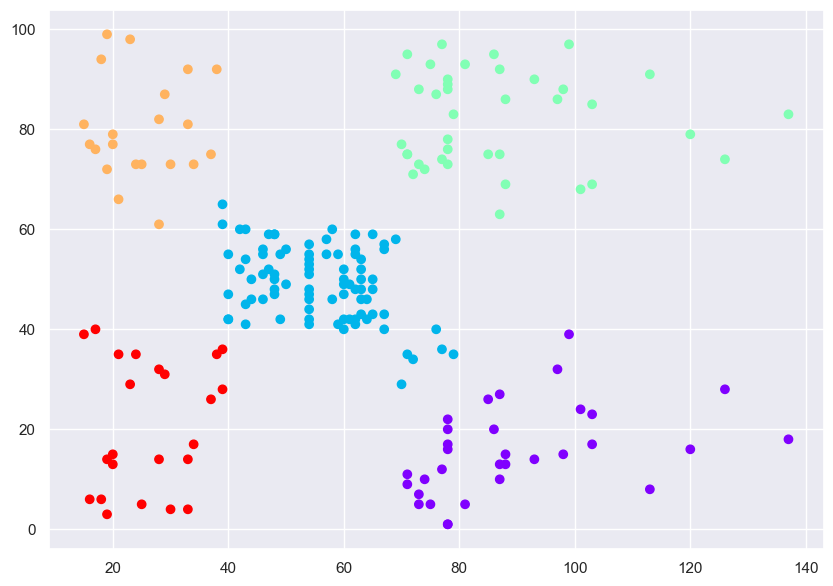

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### Задача
Задание. Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
print(iris.shape)
iris["variety"].unique()

(150, 5)


array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
data = iris.iloc[:, 2:4].values
iris.iloc[:, 2:4]

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<Figure size 5040x2160 with 0 Axes>

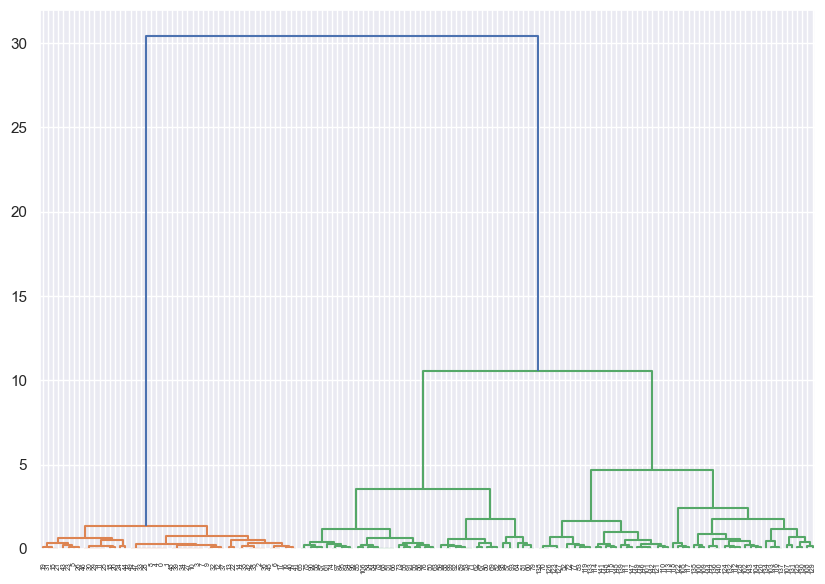

In [ ]:

plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

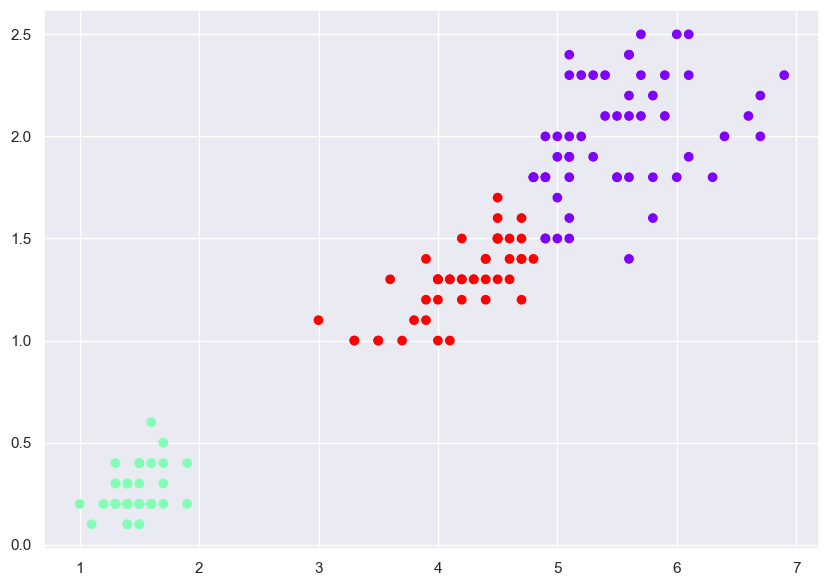

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')